## SPAM OR HAM EMAIL CLASSIFICATION<br>

##### BASIC THEORY - TEXT REPRESENTATION USING BAG OF WORDS TECHNIQUE
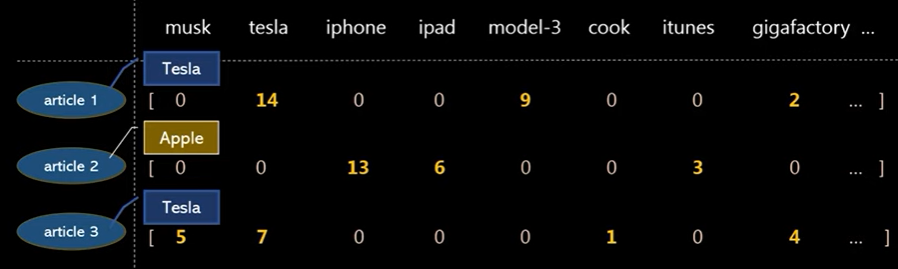

### IMPORTING SPAM DATASET AND ESSENTIAL PACKAGES 

In [3]:
import pandas as pd
import numpy as np

C:\Users\Welcome\AppData\Local\Temp\ipykernel_8240\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
df = pd.read_csv("../datasets/spam.csv")

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.Message.value_counts()

Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.      

#### CONVERTING CATEGORY COLUMN TO NUMERICAL REPRESENTATION

In [10]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [11]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#### TRAINING AND TESTING

In [12]:
from sklearn.model_selection import train_test_split

xtr,xt,ytr,yt = train_test_split(df['Message'],df['spam'],test_size=0.2)

#### CONVERTING TEXT TO VECTOR REPRESENTATION
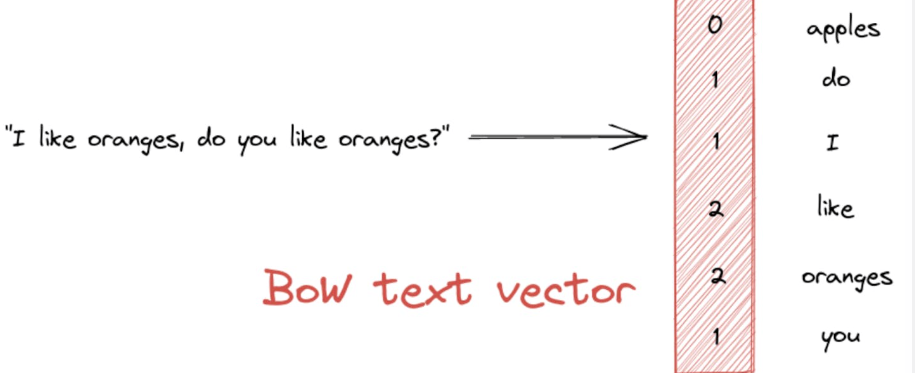


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

c = CountVectorizer()
xtr_cv = c.fit_transform(xtr)

#### MODEL CREATION 

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(xtr_cv,ytr)

MultinomialNB()

#### CONVERTING XTEST VALUES TO VECTORISED FORM SIMILAR TO CONVERTING THR TRAINING DATASET

In [23]:
xt_cv = c.transform(xt)

#### PREDICTION

In [24]:
from sklearn.metrics import classification_report

ypred = model.predict(xt_cv)
classification_report(ypred,yt)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       976\n           1       0.91      0.98      0.94       139\n\n    accuracy                           0.99      1115\n   macro avg       0.95      0.98      0.97      1115\nweighted avg       0.99      0.99      0.99      1115\n'

#### PROGRESS REPORT

In [25]:
print('              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       976\n           1       0.91      0.98      0.94       139\n\n    accuracy                           0.99      1115\n   macro avg       0.95      0.98      0.97      1115\nweighted avg       0.99      0.99      0.99      1115\n')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.91      0.98      0.94       139

    accuracy                           0.99      1115
   macro avg       0.95      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



#### TESTING THE MODEL WITH NEW DATA

In [26]:
emails=[
 "Hey man, can we get together to watch football .",
 "Upto 20% Discount on parking, exclusive offer just for you.DON'T miss this reward!"
]

#### GOOD RESULT ACQUIRED

In [27]:
email_count = c.transform(emails)
model.predict(email_count)

array([0, 1], dtype=int64)

#### DOING THE ABOVE THINGS IN MUCH SIMPLER WAY USING PIPELING 

In [30]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorize',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [31]:
clf.fit(xtr,ytr)

Pipeline(steps=[('vectorize', CountVectorizer()), ('nb', MultinomialNB())])

In [32]:
ypred = clf.predict(xt)
print(classification_report(ypred,yt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.91      0.98      0.94       139

    accuracy                           0.99      1115
   macro avg       0.95      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115

